In [2]:

def f(x1,x2):
    return x1*x1/3+x1*x2/6-127*x1/6+x2*x2/3-91*x2/6+239/2
#метод скользящего окна    
def FindByScrollWindow(X1,X2,ei,ej):
    h=100
    # ширина окна
    X=[X1,X2]
    if ei==1:  
        while not (f(X[0]-h,X[1])>f(X[0],X[1])and  f(X[0],X[1])<f(X[0]+h,X[1])):
            if f(X[0]-h,X[1])>f(X[0]+h,X[1]):
                X[0]=X[0]+h/2
            else:
                X[0]=X[0]-h/2
        z=[X[0]-h,X[0]+h]
    if ej==1:
        while not (f(X[0],X[1]-h)>f(X[0],X[1])and  f(X[0],X[1])<f(X[0],X[1]+h)):
            if f(X[0],X[1]-h)>f(X[0],X[1]+h):
                X[1]=X[1]-h/2
            else:
                X[1]=X[1]+h/2
        z=[X[1]-h,X[1]+h]
            
            
    return z


In [3]:
#Метод квадратичной интерполяции
import numpy as np

def QuadraticInterpolationMethod(x1,x2,ei,ej):
    h=0.0001
    X=[x1,x2]
    E=0.001
    if ei==1 and ej==0:

        O=FindByScrollWindow(X[0],X[1],ei,ej)
        #расчет x1,x2,x3
        X1=(O[0]+O[1])/2
        X2=X1+h
        if f(X1,X[1])>f(X2,x[1]):
            X3=X1+2*h
        else:
            X3=X1-h
        #расчет X*
        x_=((X2**2-X3**2)*f(X1,X[1])+(X3**2-X1**2)*f(X2,X[1])+(X1**2-X2**2)*f(X3,X[1]))/(2*((X2-X3)*f(X1,X[1])+(X3-X1)*f(X2,X[1])+(X1-X2)*f(X3,X[1])))

        F=[f(X1,X[1]),f(X2,X[1]),f(X3,X[1])]
        Fmin=F[np.argmin(F)]
        if Fmin==f(X1,X[1]):
            Xmin=X1
        if Fmin==f(X2,X[1]):
            Xmin=X2
        if Fmin==f(X3,X[1]):
            Xmin=X3
        while abs(Fmin-f(x_,X[1]))>E:
            if x_>X1 and x_<X3:
                if f(Xmin,X[1])<f(x_,X[1]):
                    X1=Xmin
                else:
                    X1=X_
            else:
                X1=x_

            x_=((X2**2-X3**2)*f(X1,X[1])+(X3**2-X1**2)*f(X2,X[1])+(X1**2-X2**2)*f(X3,X[1]))/(2*((X2-X3)*f(X1,X[1])+(X3-X1)*f(X2,X[1])+(X1-X2)*f(X3,X[1])))
            F=[f(X1,X[1]),f(X2,X[1]),f(X3,X[1])]
            Fmin=F[np.argmin(F)]
            if Fmin==f(X1,X[1]):
                Xmin=X1
            if Fmin==f(X2,X[1]):
                Xmin=X2
            if Fmin==f(X3,X[1]):
                Xmin=X3
        X=[X1,X[1]]
        
    else:
        O=FindByScrollWindow(X[0],X[1],ei,ej)
        #расчет x1,x2,x3
        X1=(O[0]+O[1])/2
        X2=X1+h
        if f(X[0],X1)>f(X[0],X2):
            X3=X1+2*h
        else:
            X3=X1-h
        #расчет X*
        x_=((X2**2-X3**2)*f(X[0],X1)+(X3**2-X1**2)*f(X[0],X2)+(X1**2-X2**2)*f(X[0],X3))/(2*((X2-X3)*f(X[0],X1)+(X3-X1)*f(X[0],X1)+(X1-X2)*f(X[0],X3)))

        F=[f(X[0],X1),f(X[0],X2),f(X[0],X3)]
        Fmin=F[np.argmin(F)]
        if Fmin==f(X[0],X1):
            Xmin=X1
        if Fmin==f(X[0],X2):
            Xmin=X2
        if Fmin==f(X[0],X3):
            Xmin=X3
        while abs(Fmin-f(X[0],x_))>E:
            if x_>X1 and x_<X3:
                if f(X[0],Xmin)<f(X[0],x_):
                    X1=Xmin
                else:
                    X1=x_
            else:
                X1=x_
            X_K=[X[0],X1]
            x_=((X2**2-X3**2)*f(X[0],X1)+(X3**2-X1**2)*f(X[0],X2)+(X1**2-X2**2)*f(X[0],X3))/(2*((X2-X3)*f(X[0],X1)+(X3-X1)*f(X[0],X2)+(X1-X2)*f(X[0],X3)))
            F=[f(X[0],X1),f(X[0],X2),f(X[0],X3)]
            Fmin=F[np.argmin(F)]
            if Fmin==f(X[0],X1):
                Xmin=X1
            if Fmin==f(X[0],X2):
                Xmin=X2
            if Fmin==f(X[0],X3):
                Xmin=X3
        X=[X[0],X1]  
    return X




In [4]:
#метод покоординатного спуска
#n=2
def MetodPokoordinatnogoSpyska(x1,x2):
    X=[x1,x2]
    X_K=[]
    X_K.append(X)
    n=2
    for k in range(5):

        if k-(k//n)*n+1==1:
            ei=1
            ej=0
        if k-(k//n)*n+1==2:
            ei=0
            ej=1
        X=QuadraticInterpolationMethod(X[0],X[1],ei,ej)
        X_K.append(X)
        #print(X)
    return(X_K)
x=[9,25]
X_K=MetodPokoordinatnogoSpyska(x[0],x[1])


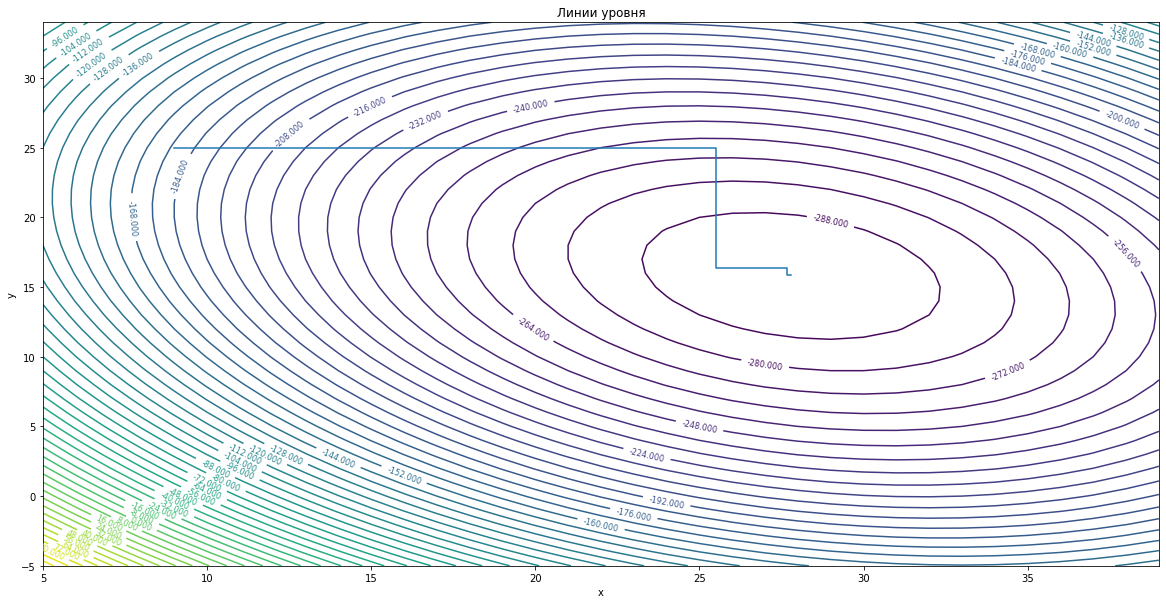

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Xgr=[X_K[i][0]for i in range(6)]
Ygr=[X_K[i][1]for i in range(6)]




x = [i for i in range(5,40)]
y = [i for i in range(-5,35)]
X, Y = np.meshgrid(x, y)
Z = X*X/3+X*Y/6-127*X/6+Y*Y/3-91*Y/6+239/2
plt.figure(figsize = (20, 10))
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
CS=plt.contour(X, Y, Z,50)
plt.clabel(CS, fontsize=8)
plt.plot(Xgr,Ygr)
plt.show()